# Import libraries

In [2]:
import os
os.system("pip install netCDF4")
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

  Using cached netCDF4-1.6.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using cached cftime-1.6.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


In [24]:
nc.variables

{'x': <class 'netCDF4._netCDF4.Variable'>
 float64 x(x)
 unlimited dimensions: 
 current shape = (250,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 float64 y(y)
 unlimited dimensions: 
 current shape = (250,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'z': <class 'netCDF4._netCDF4.Variable'>
 float64 z(z)
 unlimited dimensions: 
 current shape = (50,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 't': <class 'netCDF4._netCDF4.Variable'>
 float64 t(t)
 unlimited dimensions: t
 current shape = (49,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'density_dry': <class 'netCDF4._netCDF4.Variable'>
 float64 density_dry(t, z, y, x)
 unlimited dimensions: t
 current shape = (49, 50, 250, 250)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'uvel': <class 'netCDF4._netCDF4.Variable'>
 float64 uvel(t, z, y, x)
 unlimited dimensions: t
 current shape = (49, 50, 25

# Load data

In [37]:
HDdir = ''
t = -1 # 5 -1
saveFig = False

nc = Dataset(f"{HDdir}supercell_3d_nolim9_native.nc","r")

data = nc.variables["vvel"][t,:,:,:].transpose(2,1,0)
nx, ny, nz = data.shape

X, Y, Z = np.meshgrid(np.arange(nx), np.arange(ny), -np.arange(nz))

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 20),
    'cmap': 'plasma',
}

# Plot

(0.0, 249.0, 0.0, 249.0)

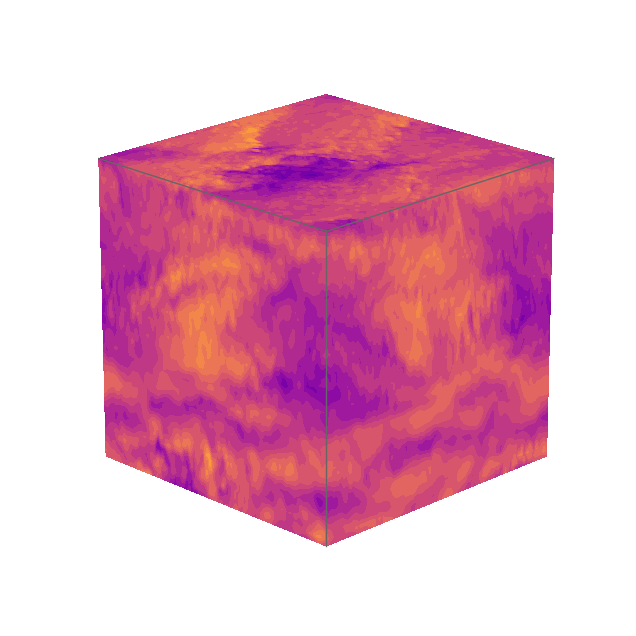

In [38]:
# Create a figure with 3D ax
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X',
    ylabel='Y',
    zlabel='Z',
    #zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(20, -45)
ax.set_box_aspect([1,1,1], zoom=0.9)
ax.axis("off")

# # Colorbar
# fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Density')

# # Show Figure
# if saveFig: plt.savefig(f'Figs/flow_{res}_time{t}.png', bbox_inches='tight')